In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv("G:\myfolder\Mall_Customers.csv")

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

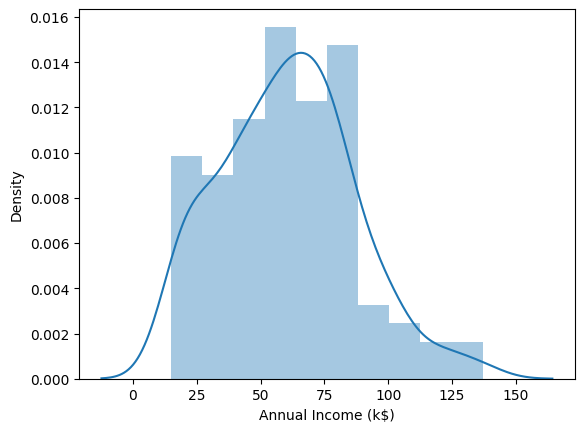

In [18]:
sns.distplot(df['Annual Income (k$)']) # dist of dataset (hist + kde)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

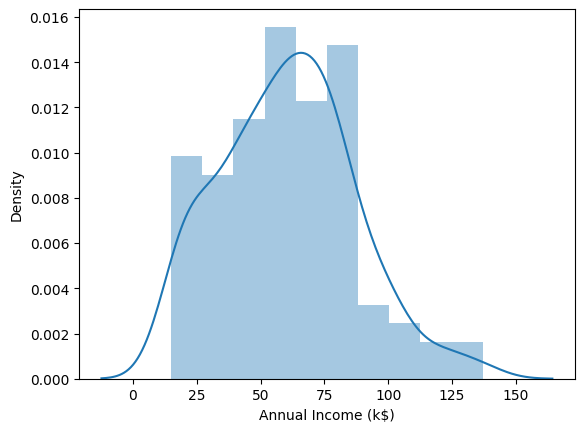

In [19]:
sns.distplot(df['Annual Income (k$)']) # dist of dataset (hist + kde)

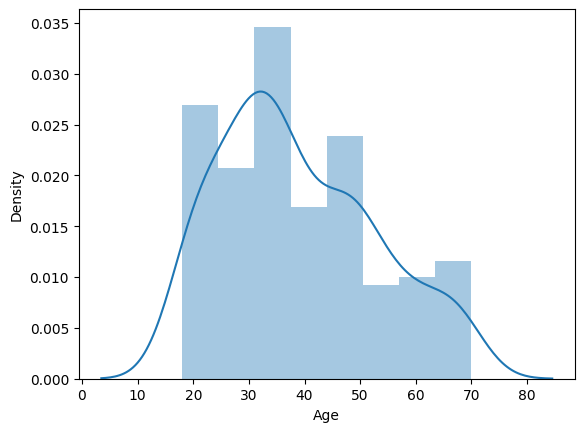

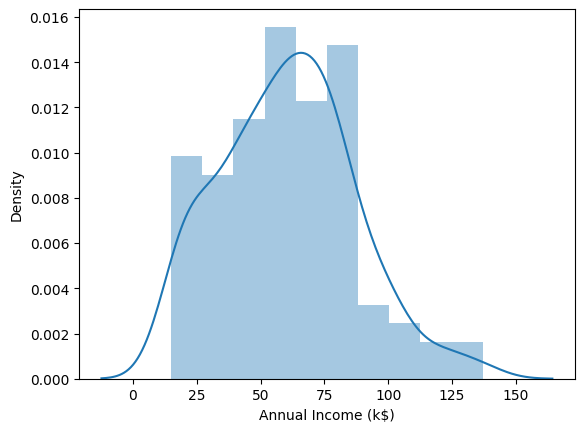

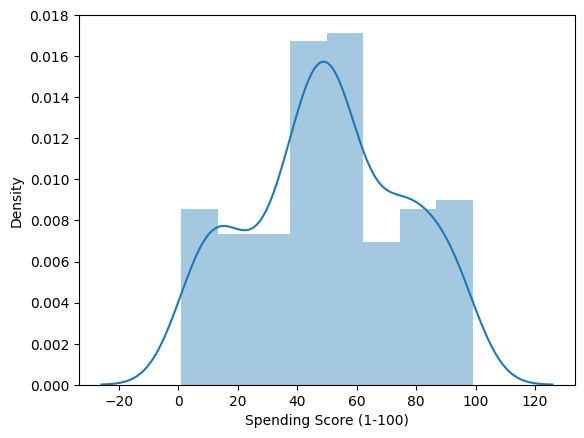

In [20]:
columns=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

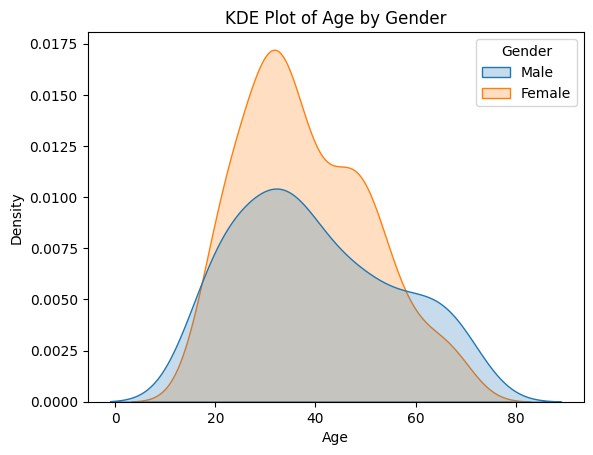

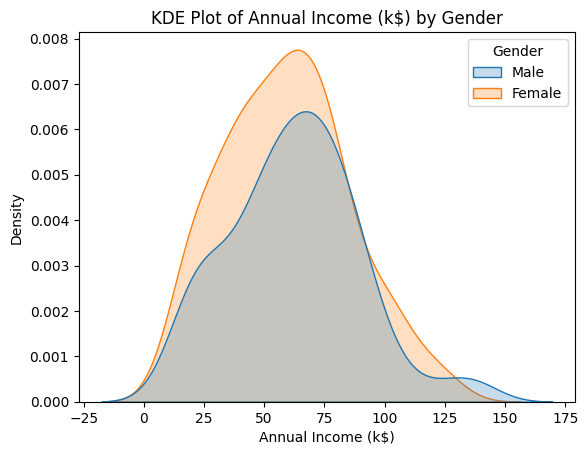

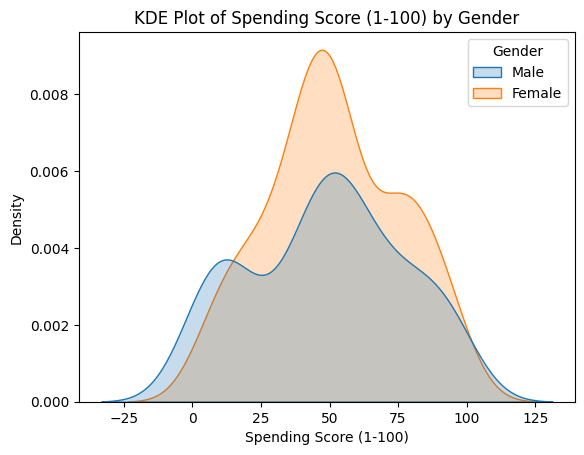

In [24]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(          # plot kde curve
        data=df,          
        x=i,             #sets the X-axis variable
        hue="Gender",    #splits data by gender
        fill=True        #shades the area under curve
    )
    plt.title(f"KDE Plot of {i} by Gender")     # adds the title to graph
    plt.show()


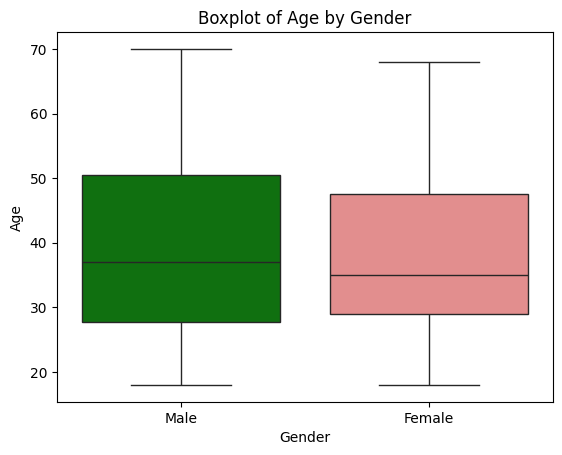

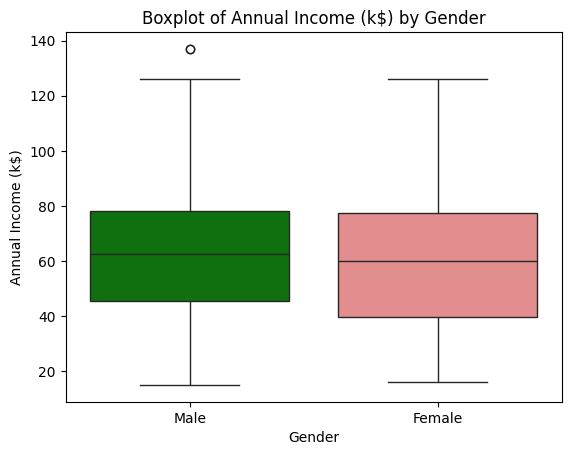

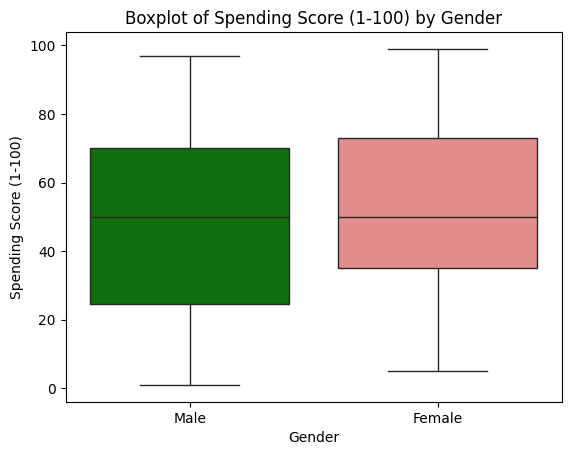

In [23]:


columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.boxplot(
        data=df,
        x='Gender',
        y=i,   # better than df[i]
        palette={"Male": "green", "Female": "lightcoral"}  # custom colors
    )
    plt.title(f"Boxplot of {i} by Gender")
    plt.show()



In [31]:
df["Gender"].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

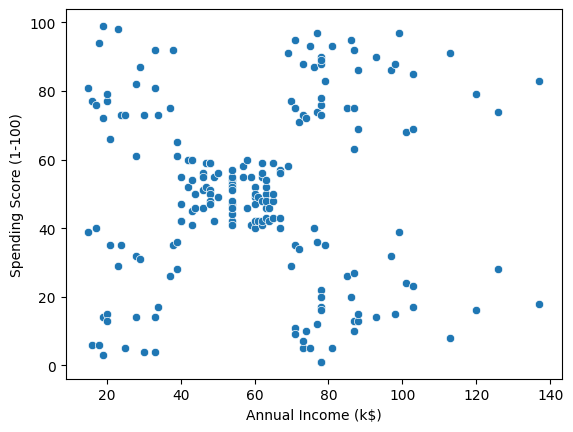

In [25]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

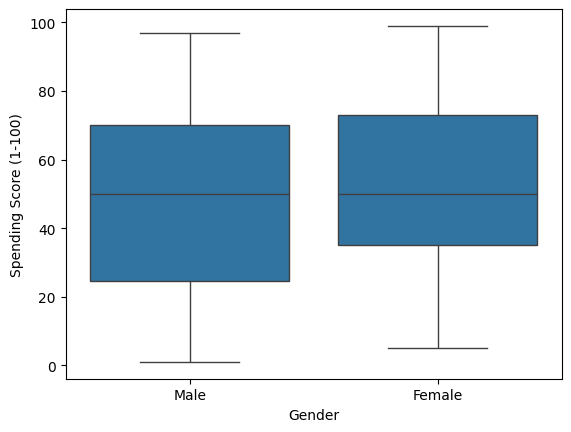

In [31]:
sns.boxplot(data=df,x='Gender', y='Spending Score (1-100)')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

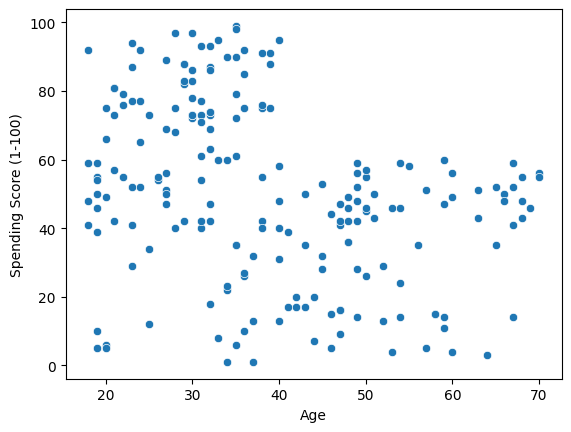

In [32]:
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=df)

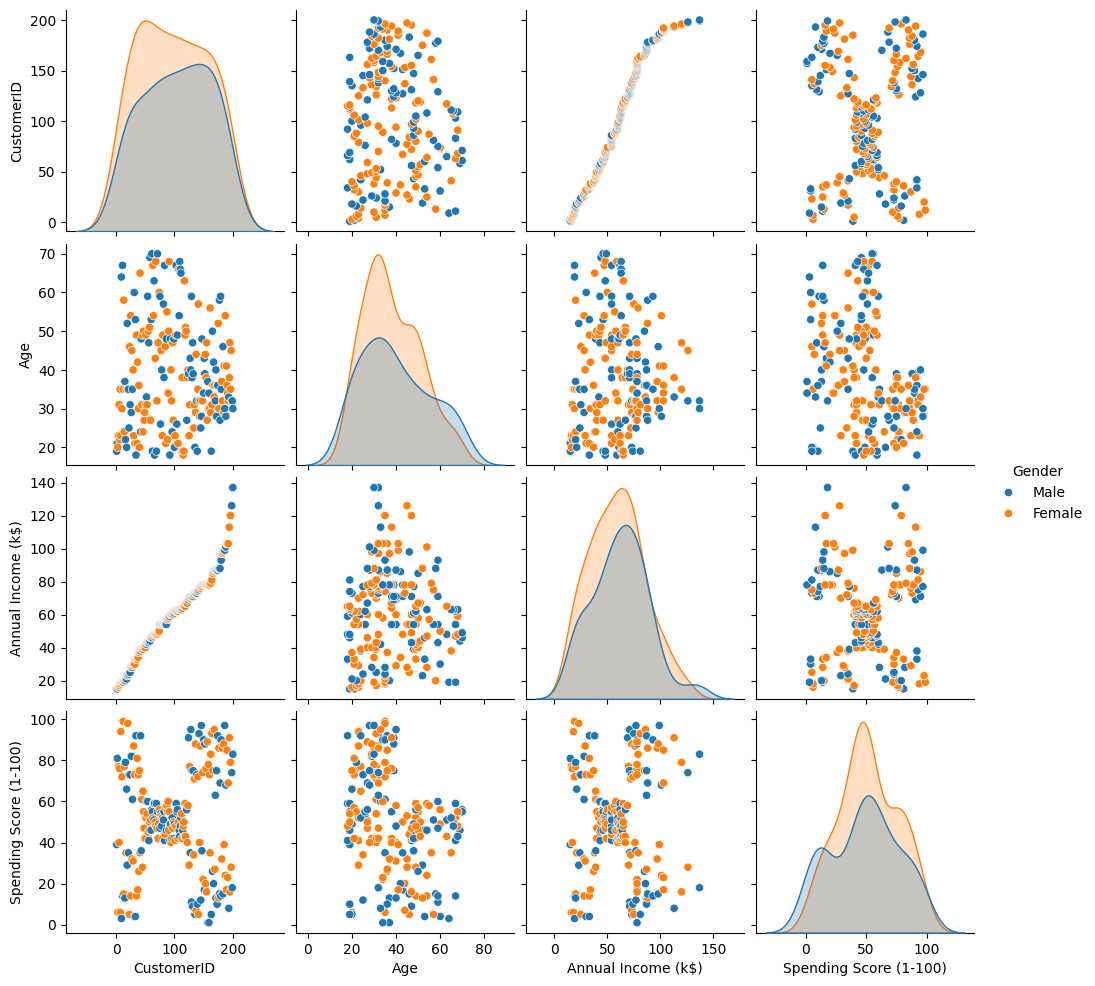

In [33]:
sns.pairplot(df,hue='Gender')

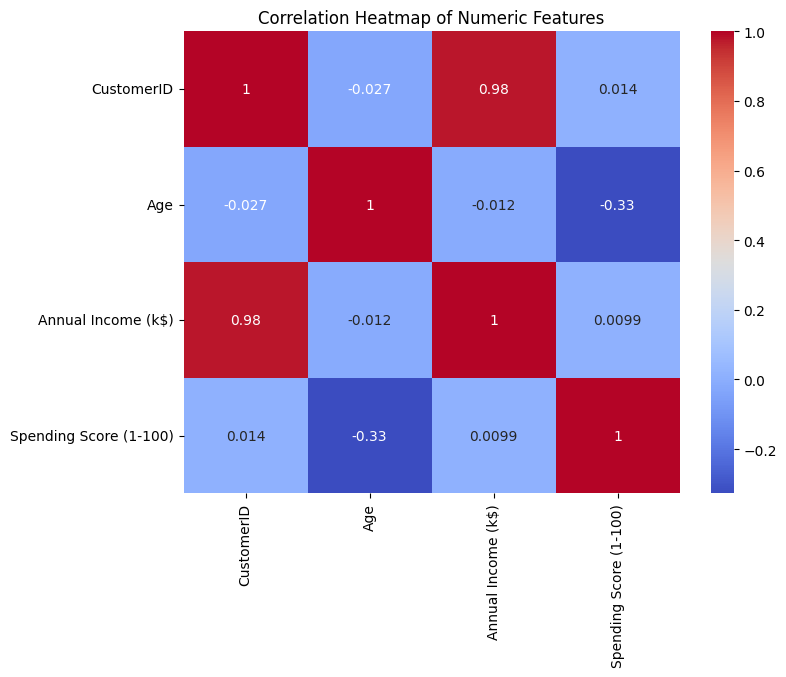

In [36]:
# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



In [38]:
clustering1 = KMeans(n_clusters=3)

In [40]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [44]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


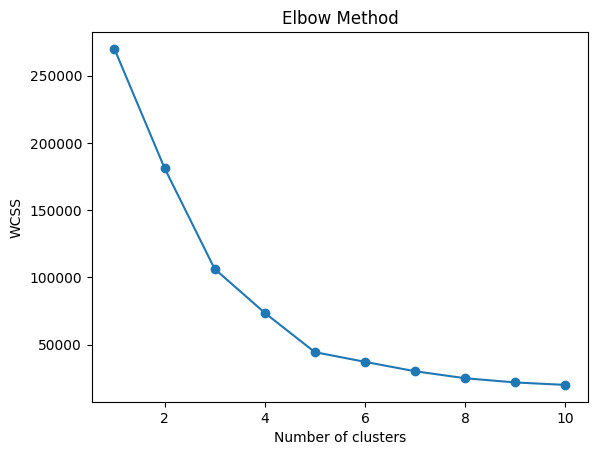

In [45]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




In [41]:
df['Income Cluster'] = clustering1.labels_
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [48]:

clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,1


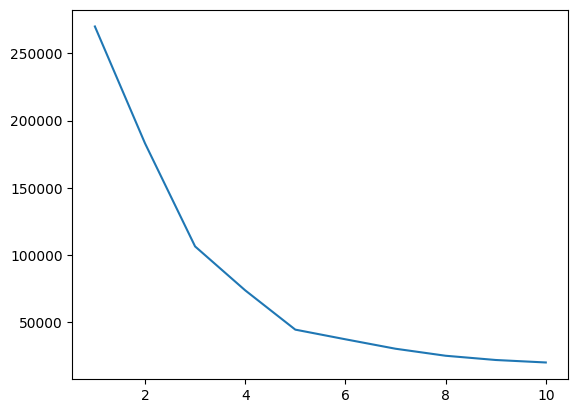

In [49]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)